<a href="https://colab.research.google.com/github/kanishkapg/potato_leaf_disease/blob/main/Potato_Leaf_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [13]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [16]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/ML datasets/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2192 files belonging to 3 classes.


In [17]:
class_names = df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [18]:
len(df)

69

In [19]:
for image_batch, labels_batch in df.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 2 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 2 1 1 0 0 0 1 1 1]


In [20]:
for image_batch, labels_batch in df.take(1):
    print(image_batch[0].numpy())

[[[187. 190. 207.]
  [187. 190. 207.]
  [186. 189. 206.]
  ...
  [137. 135. 149.]
  [162. 160. 174.]
  [164. 162. 176.]]

 [[186. 189. 206.]
  [186. 189. 206.]
  [185. 188. 205.]
  ...
  [158. 156. 170.]
  [165. 163. 177.]
  [153. 151. 165.]]

 [[186. 189. 206.]
  [185. 188. 205.]
  [185. 188. 205.]
  ...
  [128. 126. 140.]
  [141. 139. 153.]
  [140. 138. 152.]]

 ...

 [[182. 184. 196.]
  [181. 183. 195.]
  [180. 182. 194.]
  ...
  [125. 123. 136.]
  [119. 117. 130.]
  [122. 120. 133.]]

 [[183. 185. 197.]
  [182. 184. 196.]
  [181. 183. 195.]
  ...
  [127. 125. 138.]
  [121. 119. 132.]
  [126. 124. 137.]]

 [[183. 185. 197.]
  [181. 183. 195.]
  [180. 182. 194.]
  ...
  [126. 124. 137.]
  [120. 118. 131.]
  [127. 125. 138.]]]


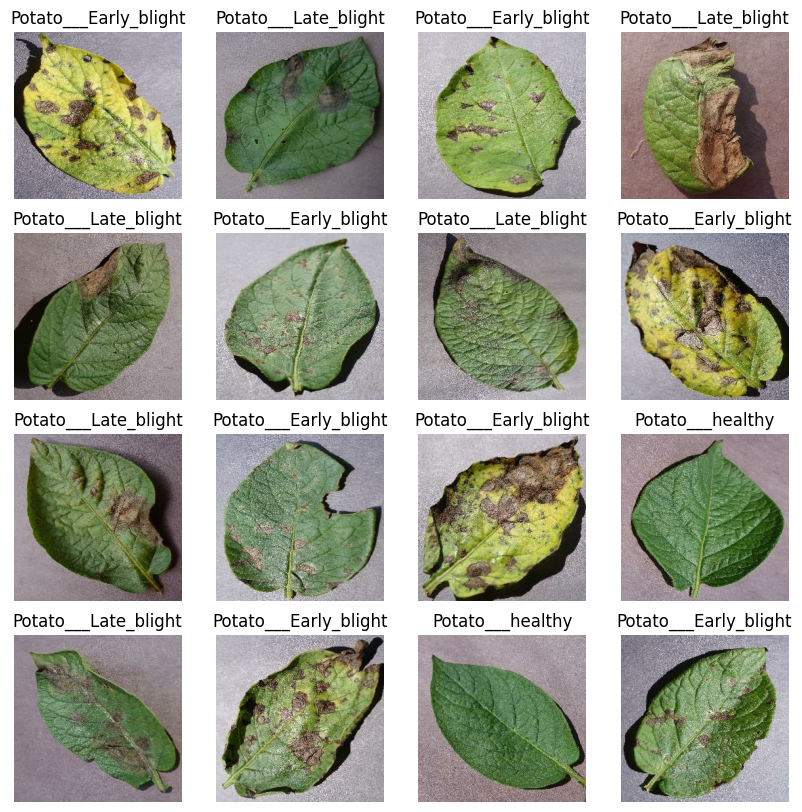

In [21]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in df.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")